# Project akhir GDSC AI

Roland - 2301847253

In [1]:
! wget https://raw.githubusercontent.com/admantiumblack/project-akhir-gdsc/main/weatherHistory.csv

--2022-03-21 14:44:44--  https://raw.githubusercontent.com/admantiumblack/project-akhir-gdsc/main/weatherHistory.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16294377 (16M) [text/plain]
Saving to: ‘weatherHistory.csv’

weatherHistory.csv  100%[===================>]  15.54M  --.-KB/s    in 0.1s    

2022-03-21 14:44:46 (109 MB/s) - ‘weatherHistory.csv’ saved [16294377/16294377]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [3]:
df = pd.read_csv('/content/weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [5]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
len(df['Summary'].unique())

27

In [7]:
len(df['Daily Summary'].unique())

214

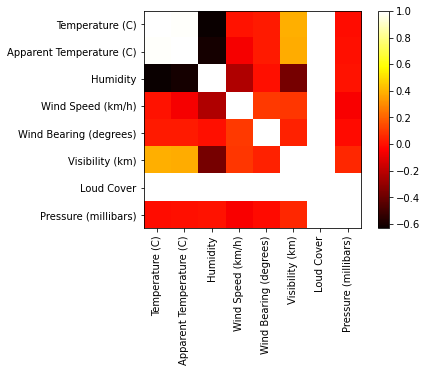

In [8]:
corr = df.corr()
pos = plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.yticks([i for i in range(len(corr))],labels=corr.index)
plt.xticks([i for i in range(len(corr))],labels=corr.columns, rotation=90)
plt.colorbar(pos)
plt.show()

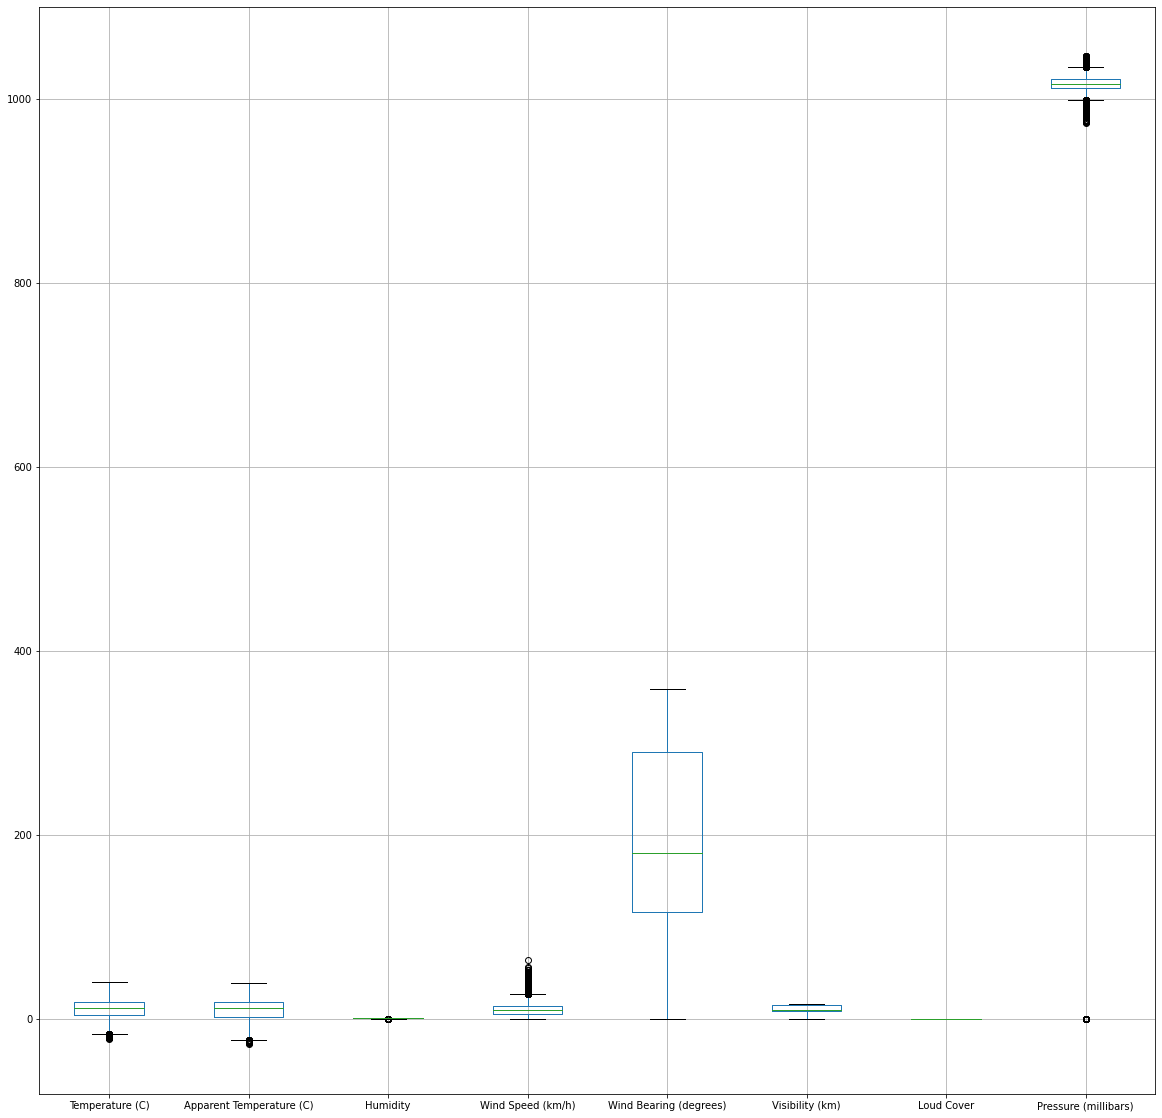

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))
df.boxplot(ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


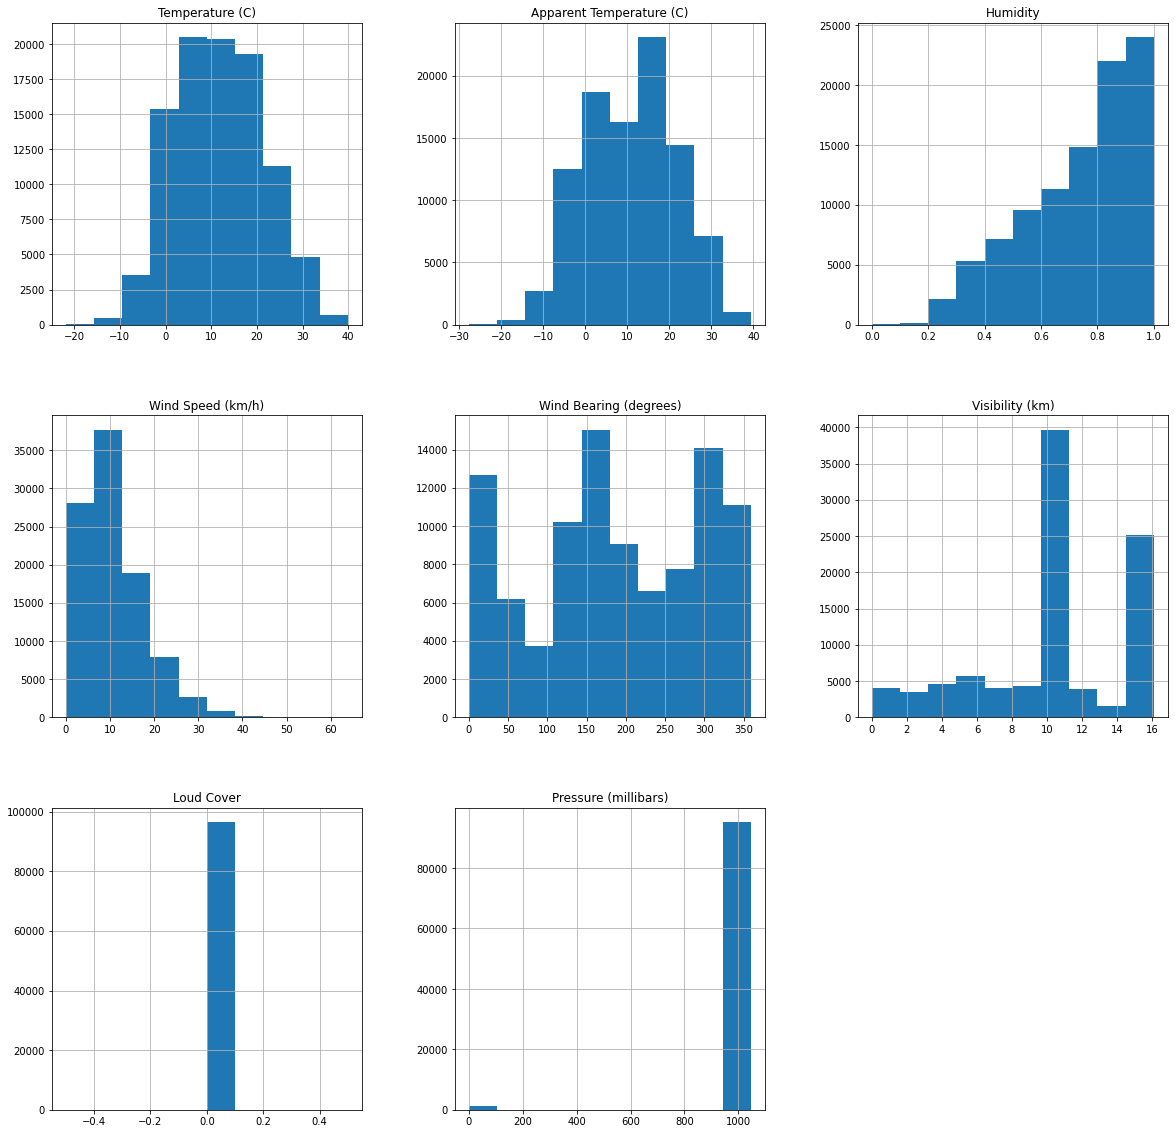

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))
df.hist(ax=ax)
plt.show()

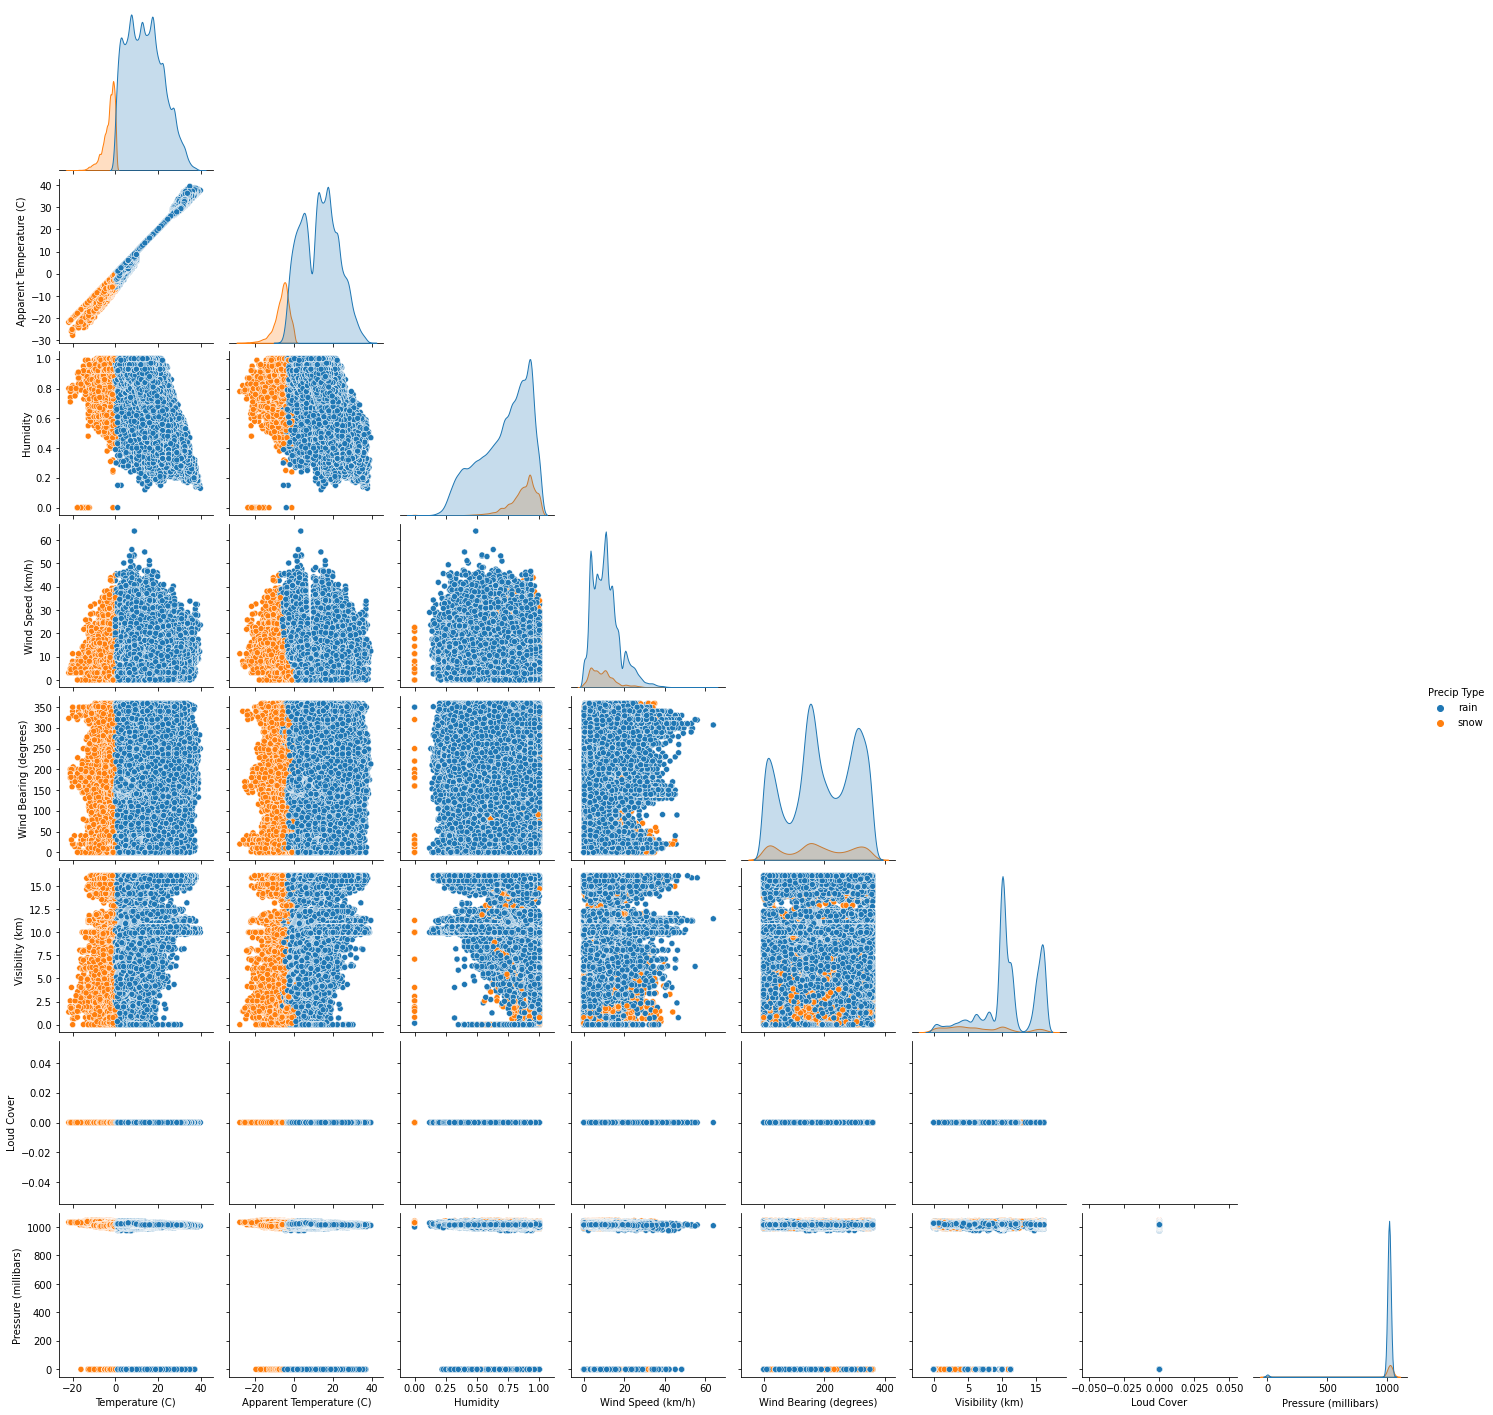

In [11]:
sb.pairplot(df, hue='Precip Type', corner=True)
plt.show()

# Feature selection

columns to be droped:


1.   Formatted Data: date can not be used to predict the preciip type
2.   Summary: High Cardinality
3.   Daily Summary: High Cardinality
4.   Loud Cover: Value is exactly the same for every row
5.   Apparent Temperature: high correlation with Temperature
6.   Humidity: High correlation with Temperature


In [12]:
new_df = df.drop(['Formatted Date', 'Summary', 'Daily Summary', 'Loud Cover', 'Apparent Temperature (C)', 'Humidity'], axis=1)

# Handle missing data

In [13]:
new_df = new_df.dropna()
new_df

,Precip Type,Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...
96448,rain,26.016667,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,10.5294,20.0,16.1000,1015.95


In [14]:
new_df.isna().sum()

Precip Type               0
Temperature (C)           0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
dtype: int64

# Data Preprocessing

In [15]:
target = 'Precip Type'

In [16]:
feature = ['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Temperature (C)']

In [17]:
Q1 = new_df[feature].quantile(0.25)
Q3 = new_df[feature].quantile(0.75)
IQR = Q3 - Q1

filter = (new_df[feature] >= Q1 - 1.5 * IQR) & (new_df[feature] <= Q3 + 1.5 *IQR)
new_df = new_df.loc[filter.all(axis=1)] 

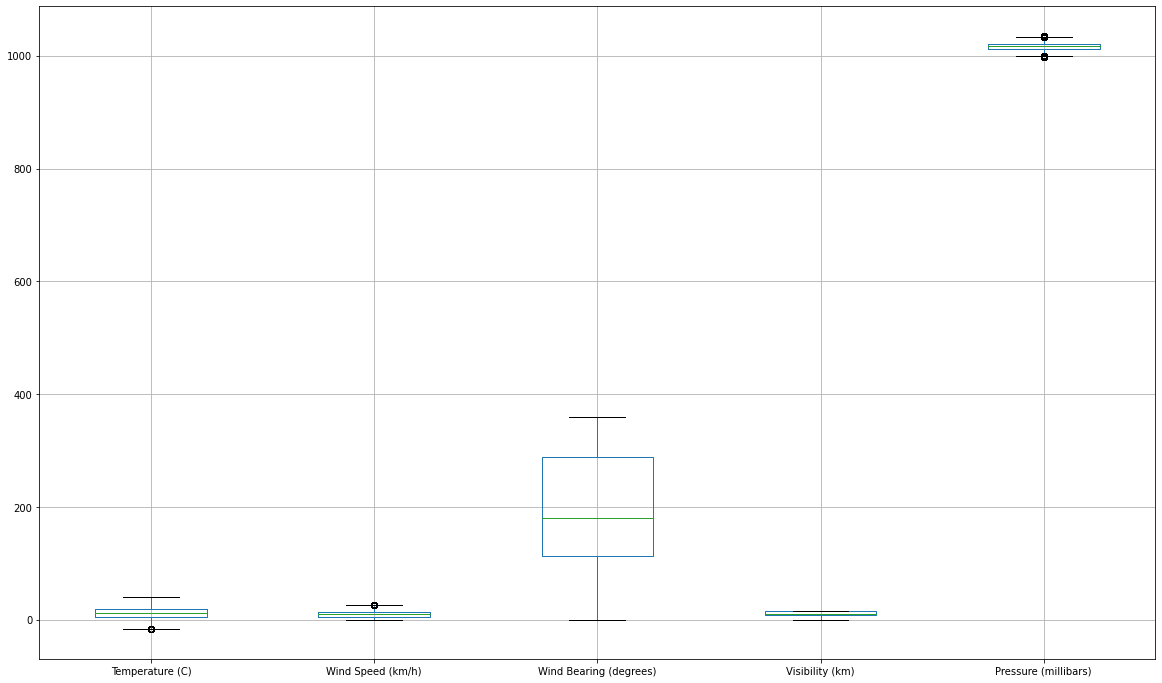

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20,12))
new_df.boxplot(ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


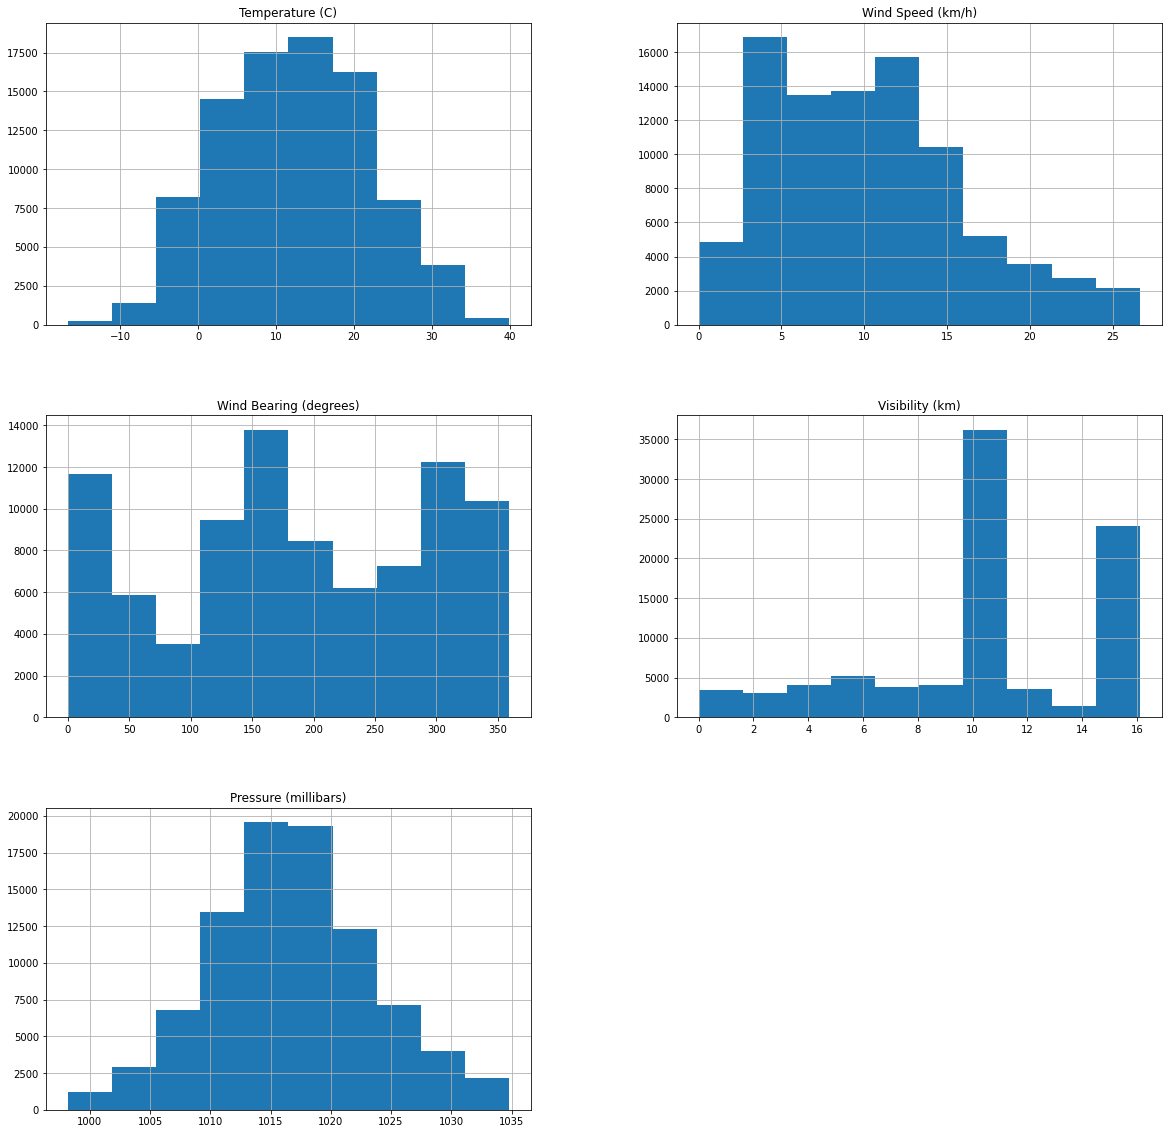

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))
new_df.hist(ax=ax)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [21]:
standardizer = StandardScaler().fit(new_df[feature])
new_df[feature] = standardizer.transform(new_df[feature])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


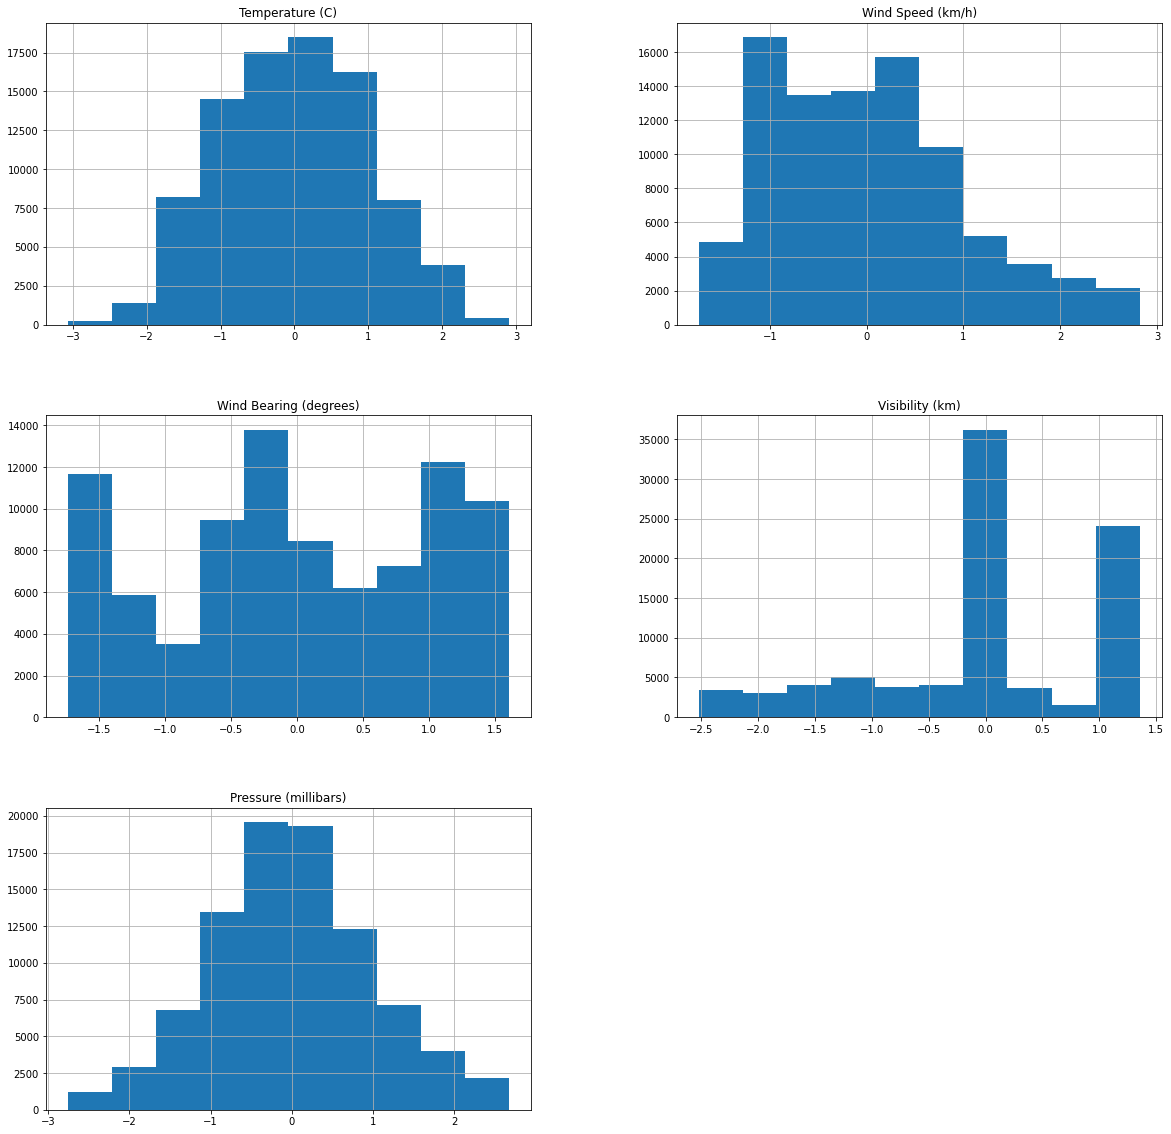

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))
new_df.hist(ax=ax)
plt.show()

In [23]:
binarizer = LabelBinarizer().fit(new_df[target])
new_df[target] = binarizer.transform(new_df[target])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Split dataset

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_x, test_x, train_y, test_y = train_test_split(new_df.drop(target, axis=1), new_df[target], test_size=0.3, stratify=new_df[target])

# Model definition and training

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression(random_state=666).fit(train_x, train_y)

# Model Testing

In [28]:
from sklearn.metrics import f1_score, classification_report

In [29]:
pred = model.predict(test_x)
score = f1_score(test_y, pred)
score

0.9865932047750231

In [30]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23952
           1       0.98      1.00      0.99      2691

    accuracy                           1.00     26643
   macro avg       0.99      1.00      0.99     26643
weighted avg       1.00      1.00      1.00     26643

